In [1]:
import os
import json
import pandas as pd

# Folder path where all JSON files are located
folder_path = r'C:\Users\bharg\Desktop\DATA 245\Group Project\odis_male_json'


In [2]:
# List to store all match data
matches_data = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):  # Process only JSON files
        file_path = os.path.join(folder_path, filename)
        
        # Use the filename (without extension) as the match_id
        match_id = os.path.splitext(filename)[0]
        
        # Load each JSON file
        with open(file_path, 'r') as file:
            data = json.load(file)

        outcome_by = data['info']['outcome'].get('by', {})
        result_margin = outcome_by.get('runs') if 'runs' in outcome_by else outcome_by.get('wickets')
        result_margin_type = 'runs' if 'runs' in outcome_by else 'wickets' if 'wickets' in outcome_by else None

        umpires = data['info'].get('officials', {}).get('umpires', [])
        umpire1 = umpires[0] if len(umpires) > 0 else None
        umpire2 = umpires[1] if len(umpires) > 1 else None

        sorted_teams = sorted(data['info']['teams'])
        team1 = sorted_teams[0]
        team2 = sorted_teams[1]



In [3]:
# List to store all match data
matches_data = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):  # Process only JSON files
        file_path = os.path.join(folder_path, filename)
        
        # Use the filename (without extension) as the match_id
        match_id = os.path.splitext(filename)[0]
        
        # Load each JSON file
        with open(file_path, 'r') as file:
            data = json.load(file)

        outcome_by = data['info']['outcome'].get('by', {})
        result_margin = outcome_by.get('runs') if 'runs' in outcome_by else outcome_by.get('wickets')
        result_margin_type = 'runs' if 'runs' in outcome_by else 'wickets' if 'wickets' in outcome_by else None

        umpires = data['info'].get('officials', {}).get('umpires', [])
        umpire1 = umpires[0] if len(umpires) > 0 else None
        umpire2 = umpires[1] if len(umpires) > 1 else None

        sorted_teams = sorted(data['info']['teams'])
        team1 = sorted_teams[0]
        team2 = sorted_teams[1]

        match_info = {
            'match_id': match_id,
            'city': data['info'].get('city', None),
            'date': data['info'].get('dates', [None])[0],  # Use the first date in the list
            'player_of_match': data['info'].get('player_of_match', [None])[0],  # First player of match
            'venue': data['info'].get('venue', None),
            'match_type' : data['info'].get('match_type',None),
            'team1': team1,
            'team2': team2,
            'toss_winner': data['info']['toss'].get('winner', None),
            'toss_decision': data['info']['toss'].get('decision', None),
            'winner': data['info']['outcome'].get('winner', None),
            'result': 'win' if 'winner' in data['info']['outcome'] else 'draw',
            'outcome_by' : data['info']['outcome'].get('by', {}),
            'result_margin': result_margin,
            'result_margin_type': result_margin_type,
            'umpire1': umpire1,
            'umpire2': umpire2,
            'season': data['info'].get('season', None), 
            'team_type': data['info'].get('team_type', None),
            'team1_players':data['info']['players'][team1],
            'team2_players':data['info']['players'][team2]
        }
        
        matches_data.append(match_info)

# Create a DataFrame with all match-level data
df_matches = pd.DataFrame(matches_data)


In [4]:
df_matches.head()

match_id      city        date  player_of_match  \
0  1000887  Brisbane  2017-01-13          MS Wade   
1  1000889      None  2017-01-15  Mohammad Hafeez   
2  1000891     Perth  2017-01-19        SPD Smith   
3  1000893      None  2017-01-22        DA Warner   
4  1000895      None  2017-01-26        DA Warner   

                                          venue match_type      team1  \
0        Brisbane Cricket Ground, Woolloongabba        ODI  Australia   
1                      Melbourne Cricket Ground        ODI  Australia   
2  Western Australia Cricket Association Ground        ODI  Australia   
3                         Sydney Cricket Ground        ODI  Australia   
4                                 Adelaide Oval        ODI  Australia   

      team2 toss_winner toss_decision  ... result      outcome_by  \
0  Pakistan   Australia           bat  ...    win    {'runs': 92}   
1  Pakistan   Australia           bat  ...    win  {'wickets': 6}   
2  Pakistan   Australia         field  ...    win  {'wickets': 7}   
3  Pakistan   Australia           bat  ...    win    {'runs': 86}   
4  Pakistan   Australia           bat  ...    win    {'runs': 57}   

  result_margin  result_margin_type      umpire1        umpire2   season  \
0          92.0                runs   MD Martell  C Shamshuddin  2016/17   
1           6.0             wickets  CB Gaffaney       P Wilson  2016/17   
2           7.0             wickets       SD Fry  C Shamshuddin  2016/17   
3          86.0                runs  CB Gaffaney     MD Martell  2016/17   
4          57.0                runs       SD Fry  C Shamshuddin  2016/17   

       team_type                                      team1_players  \
0  international  [DA Warner, TM Head, SPD Smith, CA Lynn, MR Ma...   
1  international  [UT Khawaja, DA Warner, SPD Smith, MR Marsh, T...   
2  international  [DA Warner, UT Khawaja, SPD Smith, PSP Handsco...   
3  international  [UT Khawaja, DA Warner, SPD Smith, TM Head, GJ...   
4  international  [DA Warner, TM Head, SPD Smith, GJ Maxwell, MS...   

                                       team2_players  
0  [Azhar Ali, Sharjeel Khan, Mohammad Hafeez, Ba...  
1  [Mohammad Hafeez, Sharjeel Khan, Babar Azam, A...  
2  [Mohammad Hafeez, Sharjeel Khan, Babar Azam, A...  
3  [Azhar Ali, Sharjeel Khan, Babar Azam, Mohamma...  
4  [Azhar Ali, Sharjeel Khan, Babar Azam, Mohamma...  

[5 rows x 21 columns]

In [5]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match_id            2389 non-null   object 
 1   city                2108 non-null   object 
 2   date                2389 non-null   object 
 3   player_of_match     2247 non-null   object 
 4   venue               2389 non-null   object 
 5   match_type          2389 non-null   object 
 6   team1               2389 non-null   object 
 7   team2               2389 non-null   object 
 8   toss_winner         2389 non-null   object 
 9   toss_decision       2389 non-null   object 
 10  winner              2266 non-null   object 
 11  result              2389 non-null   object 
 12  outcome_by          2389 non-null   object 
 13  result_margin       2266 non-null   float64
 14  result_margin_type  2266 non-null   object 
 15  umpire1             2389 non-null   object 
 16  umpire

In [6]:
df_matches.groupby('match_type')['match_type'].count()

match_type
ODI    2389
Name: match_type, dtype: int64

In [7]:
df_matches[df_matches['winner'].isna()]

match_id        city        date player_of_match  \
8     1004283   Edinburgh  2016-09-08            None   
24    1022349  Birmingham  2017-06-02            None   
27    1022355      London  2017-06-05            None   
58    1031669  Nottingham  2017-09-21            None   
62    1033361      Dublin  2017-05-12            None   
...       ...         ...         ...             ...   
2301   868731      Lahore  2015-05-31            None   
2327   913623  Nottingham  2016-06-21       CR Woakes   
2329   913627     Bristol  2016-06-26            None   
2341   914213      Nelson  2016-01-02            None   
2366   932861    Barbados  2016-06-19            None   

                                          venue match_type        team1  \
8     Grange Cricket Club Ground, Raeburn Place        ODI    Hong Kong   
24                                    Edgbaston        ODI    Australia   
27                              Kennington Oval        ODI    Australia   
58                                 Trent Bridge        ODI      England   
62                                     Malahide        ODI   Bangladesh   
...                                         ...        ...          ...   
2301                            Gaddafi Stadium        ODI     Pakistan   
2327                               Trent Bridge        ODI      England   
2329                              County Ground        ODI      England   
2341                                Saxton Oval        ODI  New Zealand   
2366                Kensington Oval, Bridgetown        ODI    Australia   

             team2  toss_winner toss_decision  ... result outcome_by  \
8         Scotland    Hong Kong         field  ...   draw         {}   
24     New Zealand  New Zealand           bat  ...   draw         {}   
27      Bangladesh   Bangladesh           bat  ...   draw         {}   
58     West Indies  West Indies         field  ...   draw         {}   
62         Ireland      Ireland         field  ...   draw         {}   
...            ...          ...           ...  ...    ...        ...   
2301      Zimbabwe     Pakistan           bat  ...   draw         {}   
2327     Sri Lanka      England         field  ...   draw         {}   
2329     Sri Lanka      England         field  ...   draw         {}   
2341     Sri Lanka    Sri Lanka         field  ...   draw         {}   
2366  South Africa    Australia         field  ...   draw         {}   

     result_margin  result_margin_type          umpire1           umpire2  \
8              NaN                None    GO Brathwaite         IN Ramage   
24             NaN                None   RK Illingworth  RA Kettleborough   
27             NaN                None      CB Gaffaney          NJ Llong   
58             NaN                None        RJ Tucker         RJ Bailey   
62             NaN                None         IJ Gould       M Hawthorne   
...            ...                 ...              ...               ...   
2301           NaN                None       Ahsan Raza         RB Tiffin   
2327           NaN                None        RJ Bailey        PR Reiffel   
2329           NaN                None       PR Reiffel       RT Robinson   
2341           NaN                None        BF Bowden    RK Illingworth   
2366           NaN                None  HDPK Dharmasena         JS Wilson   

       season      team_type  \
8        2016  international   
24       2017  international   
27       2017  international   
58       2017  international   
62       2017  international   
...       ...            ...   
2301     2015  international   
2327     2016  international   
2329     2016  international   
2341  2015/16  international   
2366     2016  international   

                                          team1_players  \
8     [Nizakat Khan, Aizaz Khan, Babar Hayat, Anshum...   
24    [DA Warner, AJ Finch, SPD Smith, MC Henriques,...   
27    [DA Warner, AJ Finch, SPD Smith, MC Henriques,...   
58    [J

In [8]:
# First Drop the Unwanted Columns
df_matches.drop(['outcome_by'],axis=1,inplace=True)
df_matches = df_matches.dropna()

In [9]:
df_matches.head()

match_id          city        date player_of_match  \
0   1000887      Brisbane  2017-01-13         MS Wade   
2   1000891         Perth  2017-01-19       SPD Smith   
6   1001373      Canberra  2016-12-06       DA Warner   
13  1019973  Christchurch  2016-12-26      TWM Latham   
14  1019975        Nelson  2016-12-29        NT Broom   

                                           venue match_type       team1  \
0         Brisbane Cricket Ground, Woolloongabba        ODI   Australia   
2   Western Australia Cricket Association Ground        ODI   Australia   
6                                    Manuka Oval        ODI   Australia   
13                                   Hagley Oval        ODI  Bangladesh   
14                                   Saxton Oval        ODI  Bangladesh   

          team2  toss_winner toss_decision       winner result  result_margin  \
0      Pakistan    Australia           bat    Australia    win           92.0   
2      Pakistan    Australia         field    Australia    win            7.0   
6   New Zealand  New Zealand         field    Australia    win          116.0   
13  New Zealand  New Zealand           bat  New Zealand    win           77.0   
14  New Zealand   Bangladesh         field  New Zealand    win           67.0   

   result_margin_type          umpire1        umpire2   season      team_type  \
0                runs       MD Martell  C Shamshuddin  2016/17  international   
2             wickets           SD Fry  C Shamshuddin  2016/17  international   
6                runs  HDPK Dharmasena       P Wilson  2016/17  international   
13               runs       WR Knights  C Shamshuddin  2016/17  international   
14               runs         CM Brown     PR Reiffel  2016/17  international   

                                        team1_players  \
0   [DA Warner, TM Head, SPD Smith, CA Lynn, MR Ma...   
2   [DA Warner, UT Khawaja, SPD Smith, PSP Handsco...   
6   [DA Warner, AJ Finch, SPD Smith, TM Head, MR M...   
13  [Tamim Iqbal, Imrul Kayes, Soumya Sarkar, Mahm...   
14  [Tamim Iqbal, Imrul Kayes, Sabbir Rahman, Mahm...   

                                        team2_players  
0   [Azhar Ali, Sharjeel Khan, Mohammad Hafeez, Ba...  
2   [Mohammad Hafeez, Sharjeel Khan, Babar Azam, A...  
6   [MJ Guptill, TWM Latham, KS Williamson, JDS Ne...  
13  [MJ Guptill, TWM Latham, KS Williamson, NT Bro...  
14  [MJ Guptill, TWM Latham, KS Williamson, NT Bro...

In [10]:
df_matches['winner'].unique()

array(['Australia', 'New Zealand', 'South Africa', 'England', 'India',
       'Pakistan', 'Sri Lanka', 'Bangladesh', 'Hong Kong',
       'Papua New Guinea', 'Zimbabwe', 'West Indies', 'Ireland',
       'Scotland', 'United Arab Emirates', 'Nepal', 'Namibia', 'Oman',
       'United States of America', 'Netherlands', 'Canada', 'Jersey',
       'Africa XI', 'Bermuda', 'Kenya', 'Asia XI'], dtype=object)

In [11]:
# Step 2: Extract ball-by-ball data for each inning
ball_by_ball_data = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):  # Process only JSON files
        file_path = os.path.join(folder_path, filename)
        
        # Use the filename (without extension) as the match_id
        match_id = os.path.splitext(filename)[0]
        
        # Load each JSON file
        with open(file_path, 'r') as file:
            data = json.load(file)

        teams = data["info"]["teams"]
        toss_winner = data["info"]["toss"]["winner"]
        toss_decision = data["info"]["toss"]["decision"]
        
        if toss_decision == "bat":
            innings = {toss_winner: 1, teams[0] if teams[0] != toss_winner else teams[1]: 2}
        else:  # toss_decision == "field"
            innings = {toss_winner: 2, teams[0] if teams[0] != toss_winner else teams[1]: 1}
        
        

        
        for inning in data["innings"]:

            ball_number = 0
            
            team = inning["team"]
            inning_number = innings[team]  # Get the inning number
            for over in inning["overs"]:
                over_number = over["over"]
                for delivery in over["deliveries"]:
                    ball_number = ball_number + 1

                    extras = delivery.get("extras", {})
                    extra_type = list(extras.keys())[0] if extras else None
                    
                    ball_data = {
                        "match_id":match_id,
                        "innings": inning_number,
                        "team": team,
                        "over": over_number,
                        "ball_number": ball_number,
                        "batter": delivery["batter"],
                        "bowler": delivery["bowler"],
                        "non_striker": delivery["non_striker"],
                        "runs_batter": delivery["runs"]["batter"],
                        "runs_extras": delivery["runs"].get("extras", 0),
                        "runs_total": delivery["runs"]["total"],
                        "extra_type": extra_type,
                        "over": over_number,
                        "isWicketDelivery": "wickets" in delivery,
                        "player_out": delivery.get("wickets", [{}])[0].get("player_out") if "wickets" in delivery else None,
                        "kind": delivery.get("wickets", [{}])[0].get("kind") if "wickets" in delivery else None,
                        "fielders_involved": ", ".join(
                            [fielder["name"] for fielder in delivery.get("wickets", [{}])[0].get("fielders", [])]
                        ) if "wickets" in delivery else None,
                    }
                    # Include extras if available
                    extras = delivery.get("extras", {})
                    for extra_type, extra_runs in extras.items():
                        ball_data[f"extra_{extra_type}"] = extra_runs
                    ball_by_ball_data.append(ball_data)

# Create a DataFrame
df_balls = pd.DataFrame(ball_by_ball_data)

# Fill missing values for extras with 0
df_balls.fillna(0, inplace=True)

In [12]:
df_balls.head()

match_id  innings       team  over  ball_number     batter         bowler  \
0  1000887        1  Australia     0            1  DA Warner  Mohammad Amir   
1  1000887        1  Australia     0            2  DA Warner  Mohammad Amir   
2  1000887        1  Australia     0            3  DA Warner  Mohammad Amir   
3  1000887        1  Australia     0            4  DA Warner  Mohammad Amir   
4  1000887        1  Australia     0            5  DA Warner  Mohammad Amir   

  non_striker  runs_batter  runs_extras  ...  extra_type isWicketDelivery  \
0     TM Head            0            0  ...           0            False   
1     TM Head            0            0  ...           0            False   
2     TM Head            0            0  ...           0            False   
3     TM Head            0            0  ...           0            False   
4     TM Head            0            1  ...       wides            False   

   player_out kind fielders_involved extra_wides  extra_legbyes  \
0           0    0                 0         0.0            0.0   
1           0    0                 0         0.0            0.0   
2           0    0                 0         0.0            0.0   
3           0    0                 0         0.0            0.0   
4           0    0                 0         1.0            0.0   

   extra_noballs  extra_byes  extra_penalty  
0            0.0         0.0            0.0  
1            0.0         0.0            0.0  
2            0.0         0.0            0.0  
3            0.0         0.0            0.0  
4            0.0         0.0            0.0  

[5 rows x 21 columns]

In [13]:
df_balls.shape

(1266156, 21)

In [14]:
df_balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266156 entries, 0 to 1266155
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   match_id           1266156 non-null  object 
 1   innings            1266156 non-null  int64  
 2   team               1266156 non-null  object 
 3   over               1266156 non-null  int64  
 4   ball_number        1266156 non-null  int64  
 5   batter             1266156 non-null  object 
 6   bowler             1266156 non-null  object 
 7   non_striker        1266156 non-null  object 
 8   runs_batter        1266156 non-null  int64  
 9   runs_extras        1266156 non-null  int64  
 10  runs_total         1266156 non-null  int64  
 11  extra_type         1266156 non-null  object 
 12  isWicketDelivery   1266156 non-null  bool   
 13  player_out         1266156 non-null  object 
 14  kind               1266156 non-null  object 
 15  fielders_involved  1266156 non-n

In [15]:
df_balls.isnull().sum()

match_id             0
innings              0
team                 0
over                 0
ball_number          0
batter               0
bowler               0
non_striker          0
runs_batter          0
runs_extras          0
runs_total           0
extra_type           0
isWicketDelivery     0
player_out           0
kind                 0
fielders_involved    0
extra_wides          0
extra_legbyes        0
extra_noballs        0
extra_byes           0
extra_penalty        0
dtype: int64

In [16]:
batgroup = df_balls.groupby(['batter'])
batsman_Stats = pd.DataFrame(batgroup['ball_number'].count()).rename(columns={'ball_number':'Balls_Faced'})
batsman_Stats.head()

Balls_Faced
batter                  
A Ashok               12
A Athanaze           370
A Bagai              995
A Balbirnie         3285
A Bohara              14

In [17]:
batsman_Stats['innings']=batgroup['innings'].nunique()
batsman_Stats.head()

Balls_Faced  innings
batter                           
A Ashok               12        1
A Athanaze           370        2
A Bagai              995        2
A Balbirnie         3285        2
A Bohara              14        2

In [18]:
batsman_Stats['runs']=batgroup['runs_batter'].sum()
batsman_Stats.head()

Balls_Faced  innings  runs
batter                                 
A Ashok               12        1    10
A Athanaze           370        2   299
A Bagai              995        2   614
A Balbirnie         3285        2  2438
A Bohara              14        2    13

In [19]:
batsman_Stats['0s'] = df_balls[df_balls['runs_batter'] == 0].groupby('batter')['runs_batter'].count()
batsman_Stats['0s'].fillna(0,inplace=True)
batsman_Stats.head()

Balls_Faced  innings  runs      0s
batter                                         
A Ashok               12        1    10     9.0
A Athanaze           370        2   299   228.0
A Bagai              995        2   614   614.0
A Balbirnie         3285        2  2438  1909.0
A Bohara              14        2    13     5.0

In [20]:
batsman_Stats['1s'] = df_balls[df_balls['runs_batter'] == 1].groupby('batter')['runs_batter'].count()
batsman_Stats['1s'].fillna(0,inplace=True)

batsman_Stats['2s'] = df_balls[df_balls['runs_batter'] == 2].groupby('batter')['runs_batter'].count()
batsman_Stats['2s'].fillna(0,inplace=True)

batsman_Stats['3s'] = df_balls[df_balls['runs_batter'] == 3].groupby('batter')['runs_batter'].count()
batsman_Stats['3s'].fillna(0,inplace=True)

batsman_Stats['4s'] = df_balls[df_balls['runs_batter'] == 4].groupby('batter')['runs_batter'].count()
batsman_Stats['4s'].fillna(0,inplace=True)

batsman_Stats['6s'] = df_balls[df_balls['runs_batter'] == 6].groupby('batter')['runs_batter'].count()
batsman_Stats['6s'].fillna(0,inplace=True)


In [21]:
batsman_Stats.head()

Balls_Faced  innings  runs      0s     1s     2s    3s     4s  \
batter                                                                       
A Ashok               12        1    10     9.0    0.0    1.0   0.0    2.0   
A Athanaze           370        2   299   228.0   83.0   15.0   2.0   36.0   
A Bagai              995        2   614   614.0  280.0   35.0   2.0   63.0   
A Balbirnie         3285        2  2438  1909.0  934.0  148.0  26.0  239.0   
A Bohara              14        2    13     5.0    5.0    4.0   0.0    0.0   

               6s  
batter             
A Ashok       0.0  
A Athanaze    6.0  
A Bagai       1.0  
A Balbirnie  29.0  
A Bohara      0.0

In [22]:
outs = df_balls[df_balls['player_out'] != 0]
outs_count = outs['player_out'].value_counts().reset_index()
outs_count.columns = ['player_name', 'number_of_outs']

outs_count.head()

player_name  number_of_outs
0     KC Sangakkara             251
1  DPMD Jayawardene             240
2           V Kohli             238
3        TM Dilshan             229
4         RG Sharma             220

In [23]:
outs_count = outs_count.rename(columns={'player_name': 'batter'})

# Merge the player_out counts into batsman_Stats
batsman_Stats = batsman_Stats.merge(outs_count, on='batter', how='left')

# Fill NaN values in 'number_of_outs' with 0 (for players who were not out)
batsman_Stats['number_of_outs'] = batsman_Stats['number_of_outs'].fillna(0).astype(int)

# Rename 'number_of_outs' to 'player_out' for clarity
batsman_Stats.rename(columns={'number_of_outs': 'player_out'}, inplace=True)

batsman_Stats

batter  Balls_Faced  innings  runs      0s     1s     2s  \
0               A Ashok           12        1    10     9.0    0.0    1.0   
1            A Athanaze          370        2   299   228.0   83.0   15.0   
2               A Bagai          995        2   614   614.0  280.0   35.0   
3           A Balbirnie         3285        2  2438  1909.0  934.0  148.0   
4              A Bohara           14        2    13     5.0    5.0    4.0   
...                 ...          ...      ...   ...     ...    ...    ...   
1769       Ziaur Rahman           91        2    83    52.0   25.0    2.0   
1770       Zubayr Hamza           82        1    56    49.0   25.0    1.0   
1771      Zuhaib Zubair           41        2    38    22.0   10.0    5.0   
1772     Zulfiqar Babar           40        2    35    23.0    7.0    7.0   
1773  Zulqarnain Haider           70        2    48    37.0   24.0    6.0   

        3s     4s    6s  player_out  
0      0.0    2.0   0.0           1  
1      2.0   36.0   6.0          12  
2      2.0   63.0   1.0          21  
3     26.0  239.0  29.0          74  
4      0.0    0.0   0.0           0  
...    ...    ...   ...         ...  
1769   0.0    9.0   3.0          10  
1770   1.0    5.0   1.0           1  
1771   0.0    3.0   1.0           3  
1772   0.0    2.0   1.0           2  
1773   0.0    3.0   0.0           2  

[1774 rows x 11 columns]

In [24]:
batsman_Stats['bat_average'] = round(batsman_Stats['runs']/batsman_Stats['player_out'],2)
batsman_Stats['bat_average'].fillna(0,inplace=True)
batsman_Stats['bat_strike'] = round(batsman_Stats['runs']/batsman_Stats['Balls_Faced']*100,2)
batsman_Stats['bat_strike'].fillna(0,inplace=True)
batsman_Stats.head()

batter  Balls_Faced  innings  runs      0s     1s     2s    3s     4s  \
0      A Ashok           12        1    10     9.0    0.0    1.0   0.0    2.0   
1   A Athanaze          370        2   299   228.0   83.0   15.0   2.0   36.0   
2      A Bagai          995        2   614   614.0  280.0   35.0   2.0   63.0   
3  A Balbirnie         3285        2  2438  1909.0  934.0  148.0  26.0  239.0   
4     A Bohara           14        2    13     5.0    5.0    4.0   0.0    0.0   

     6s  player_out  bat_average  bat_strike  
0   0.0           1        10.00       83.33  
1   6.0          12        24.92       80.81  
2   1.0          21        29.24       61.71  
3  29.0          74        32.95       74.22  
4   0.0           0          inf       92.86

In [25]:
bowlgroup = df_balls.groupby(['bowler'])

In [26]:
bowler_Stats = pd.DataFrame(bowlgroup['ball_number'].count()).rename(columns={'ball_number':'BallsThrow'})

In [27]:
df_balls['kind'].unique()

array([0, 'bowled', 'caught', 'run out', 'lbw', 'retired hurt', 'stumped',
       'caught and bowled', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [28]:
wickets_out = df_balls[df_balls['kind'].isin(['caught','bowled', 'lbw','stumped', 'caught and bowled', 'hit wicket'])]
bowler_Stats['wickets'] = wickets_out.groupby(['bowler'])['ball_number'].count()
bowler_Stats.head()

BallsThrow  wickets
bowler                           
A Ashok               61      1.0
A Athanaze            26      NaN
A Balbirnie           24      1.0
A Bohara              66      NaN
A Codrington         187      6.0

In [29]:
bowler_Stats['wickets'].fillna(0,inplace=True)

In [30]:
bowler_Stats['overs'] = round(bowler_Stats['BallsThrow']/6)
bowler_Stats.head()

BallsThrow  wickets  overs
bowler                                  
A Ashok               61      1.0   10.0
A Athanaze            26      0.0    4.0
A Balbirnie           24      1.0    4.0
A Bohara              66      0.0   11.0
A Codrington         187      6.0   31.0

In [31]:
bowler_Stats['runs_conceded'] = df_balls.groupby('bowler')['runs_batter'].sum()
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].fillna(0)
bowler_Stats.head()

BallsThrow  wickets  overs  runs_conceded
bowler                                                 
A Ashok               61      1.0   10.0             65
A Athanaze            26      0.0    4.0             17
A Balbirnie           24      1.0    4.0             31
A Bohara              66      0.0   11.0             51
A Codrington         187      6.0   31.0            153

In [32]:
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].add(df_balls[df_balls['extra_type'].isin(['wides','noballs'])].groupby('bowler')['runs_extras'].sum(),fill_value=0)

In [33]:
bowler_Stats.head()

BallsThrow  wickets  overs  runs_conceded
bowler                                                 
A Ashok               61      1.0   10.0           65.0
A Athanaze            26      0.0    4.0           19.0
A Balbirnie           24      1.0    4.0           31.0
A Bohara              66      0.0   11.0           51.0
A Codrington         187      6.0   31.0          164.0

In [34]:
bowler_Stats['bowl_econ'] = round(bowler_Stats['runs_conceded']/bowler_Stats['overs'],2)
bowler_Stats['bowl_strike_rate']=round(bowler_Stats['BallsThrow']/bowler_Stats['wickets'],2)
bowler_Stats.head()

BallsThrow  wickets  overs  runs_conceded  bowl_econ  \
bowler                                                               
A Ashok               61      1.0   10.0           65.0       6.50   
A Athanaze            26      0.0    4.0           19.0       4.75   
A Balbirnie           24      1.0    4.0           31.0       7.75   
A Bohara              66      0.0   11.0           51.0       4.64   
A Codrington         187      6.0   31.0          164.0       5.29   

              bowl_strike_rate  
bowler                          
A Ashok                  61.00  
A Athanaze                 inf  
A Balbirnie              24.00  
A Bohara                   inf  
A Codrington             31.17

In [35]:
players_matches_dict = {}

# Iterate over each row in the dataframe
for i, row in df_balls.iterrows():
    # Check if the batter is already in the dictionary
    if row['batter'] in players_matches_dict:
        players_matches_dict[row['batter']].add(row['match_id'])
    else:
        players_matches_dict[row['batter']] = {row['match_id']}

    # Check if the non-striker is already in the dictionary
    if row['non_striker'] in players_matches_dict:
        players_matches_dict[row['non_striker']].add(row['match_id'])
    else:
        players_matches_dict[row['non_striker']] = {row['match_id']}

    # Check if the bowler is already in the dictionary
    if row['bowler'] in players_matches_dict:
        players_matches_dict[row['bowler']].add(row['match_id'])
    else:
        players_matches_dict[row['bowler']] = {row['match_id']}

# Create a dataframe with players and their number of matches
final_players_matches = pd.DataFrame({'Players': list(players_matches_dict.keys())})
final_players_matches['matches'] = final_players_matches['Players'].apply(lambda x: len(players_matches_dict[x]))
final_players_matches = final_players_matches.set_index('Players')

In [36]:
final_players_matches.head()

matches
Players                 
DA Warner            154
TM Head               67
Mohammad Amir         59
Mohammad Hafeez      203
SPD Smith            154

In [37]:
outbyCatch = df_balls[(df_balls['kind'].isin(['caught and bowled']))].groupby('bowler')['ball_number'].count().rename('bowler_catches')

In [38]:
justCatch = df_balls[(df_balls['kind'].isin(['caught']))].groupby('fielders_involved')['ball_number'].count().rename('fielder_catches')

In [39]:
catchDf = pd.merge(outbyCatch,justCatch, left_index=True, right_index=True,how='outer')
catchDf.fillna(0,inplace=True)

In [40]:
catchDf['catches'] = catchDf['bowler_catches']+catchDf['fielder_catches']
catchDf.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)

In [41]:
catchDf.head()

catches
A Ashok          1.0
A Athanaze       6.0
A Bagai         29.0
A Balbirnie     28.0
A Dananjaya     13.0

In [42]:
batsman_Stats = batsman_Stats.set_index('batter')
final_df = pd.merge(final_players_matches,batsman_Stats, left_index=True, right_index=True,how='outer')

In [43]:
final_df = pd.merge(final_df,bowler_Stats, left_index=True, right_index=True,how='outer')

In [44]:
final_df = pd.merge(final_df,catchDf, left_index=True, right_index=True,how='outer')

In [45]:
final_df = pd.merge(final_df,df_matches['player_of_match'].value_counts(),left_index=True, right_index=True,how='left')

In [46]:
final_df.fillna(0,inplace=True)
final_df.rename(columns={'count': 'man_of_matches'}, inplace=True)

In [47]:
final_df.head()

matches  Balls_Faced  innings    runs      0s     1s     2s  \
A Ashok          2.0         12.0      1.0    10.0     9.0    0.0    1.0   
A Athanaze      12.0        370.0      2.0   299.0   228.0   83.0   15.0   
A Bagai         24.0        995.0      2.0   614.0   614.0  280.0   35.0   
A Balbirnie     78.0       3285.0      2.0  2438.0  1909.0  934.0  148.0   
A Bohara         2.0         14.0      2.0    13.0     5.0    5.0    4.0   

               3s     4s    6s  ...  bat_average  bat_strike  BallsThrow  \
A Ashok       0.0    2.0   0.0  ...        10.00       83.33        61.0   
A Athanaze    2.0   36.0   6.0  ...        24.92       80.81        26.0   
A Bagai       2.0   63.0   1.0  ...        29.24       61.71         0.0   
A Balbirnie  26.0  239.0  29.0  ...        32.95       74.22        24.0   
A Bohara      0.0    0.0   0.0  ...          inf       92.86        66.0   

             wickets  overs  runs_conceded  bowl_econ  bowl_strike_rate  \
A Ashok          1.0   10.0           65.0       6.50              61.0   
A Athanaze       0.0    4.0           19.0       4.75               inf   
A Bagai          0.0    0.0            0.0       0.00               0.0   
A Balbirnie      1.0    4.0           31.0       7.75              24.0   
A Bohara         0.0   11.0           51.0       4.64               inf   

             catches  man_of_matches  
A Ashok          1.0             0.0  
A Athanaze       6.0             0.0  
A Bagai         29.0             1.0  
A Balbirnie     28.0             3.0  
A Bohara         0.0             0.0  

[5 rows x 21 columns]

In [48]:
import plotly.express as px

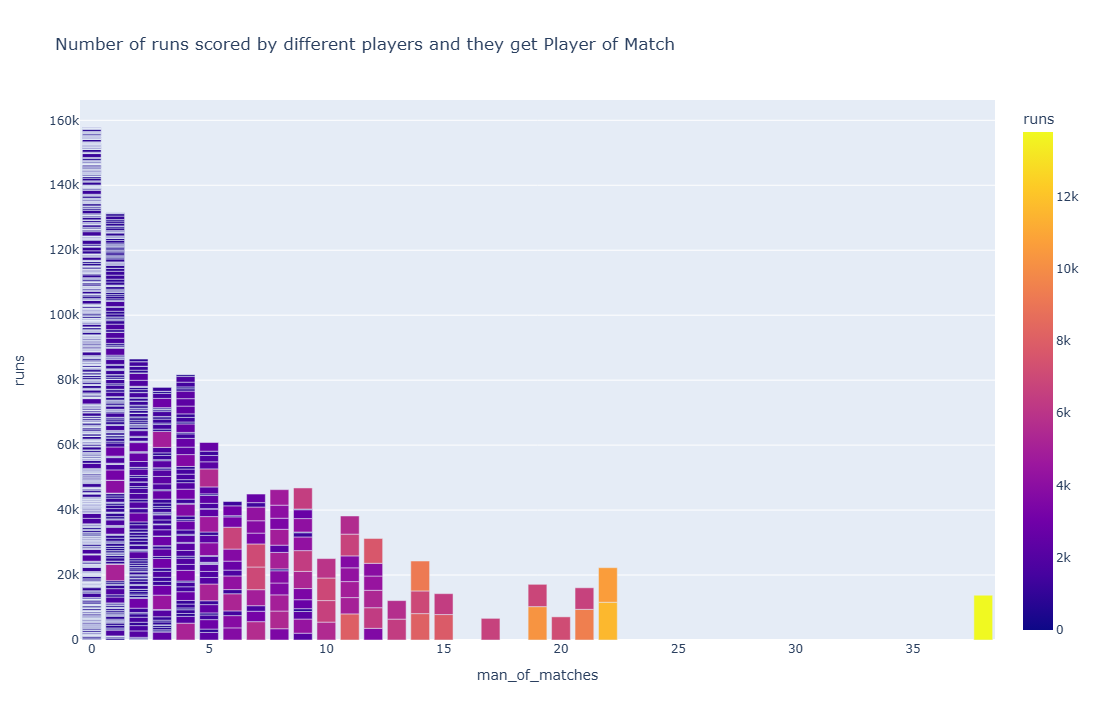

In [49]:
# create a bar plot to see the Number of runs scored by different players and they get Player of Match
fig = px.bar(final_df, x='man_of_matches', y='runs', title='Number of runs scored by different players and they get Player of Match',hover_name=final_df.index,color='runs')
# show the plot
fig.show()

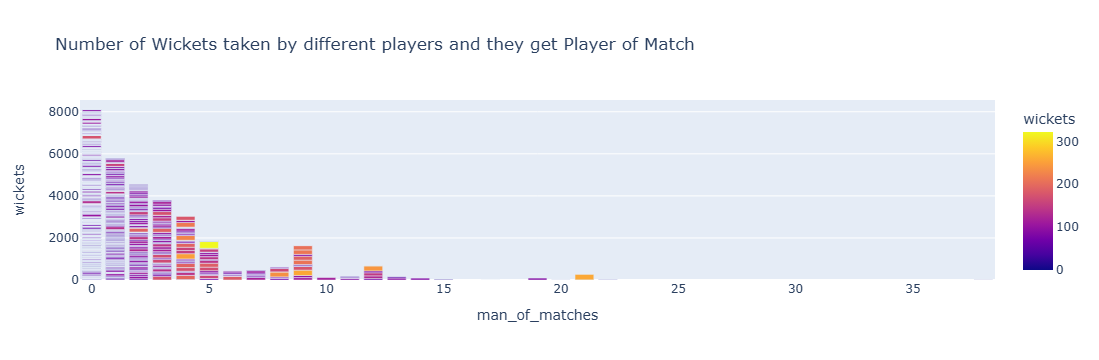

In [50]:
fig = px.bar(final_df, x='man_of_matches', y='wickets', title='Number of Wickets taken by different players and they get Player of Match',hover_name=final_df.index,color='wickets')
# show the plot
fig.show()

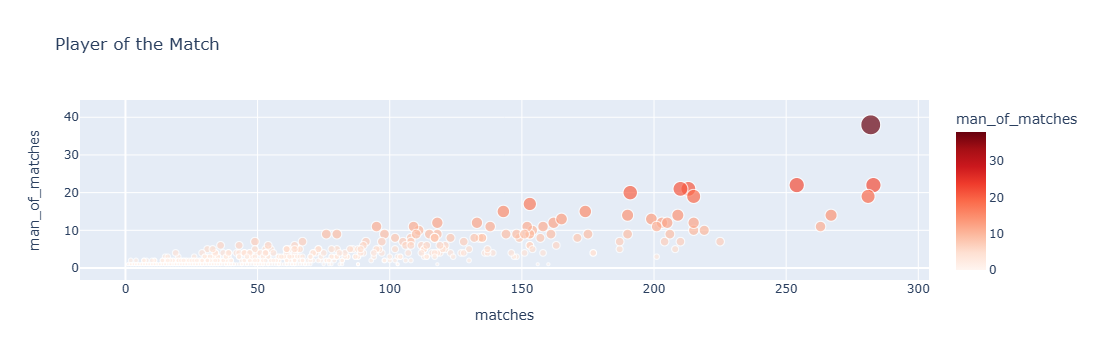

In [51]:
fig = px.scatter(final_df, x='matches', y='man_of_matches', color='man_of_matches',
                 size='man_of_matches', hover_name=final_df.index, title='Player of the Match')

# Update the color scale
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

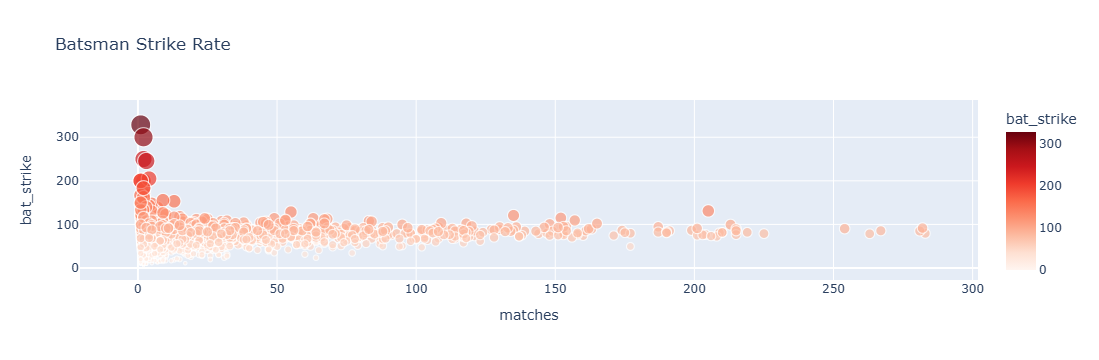

In [52]:
fig = px.scatter(final_df, x='matches', y='bat_strike',color='bat_strike',
                 size='bat_strike', hover_name=final_df.index, title='Batsman Strike Rate')
fig.update_layout(coloraxis=dict(colorscale='reds'))


fig.show()

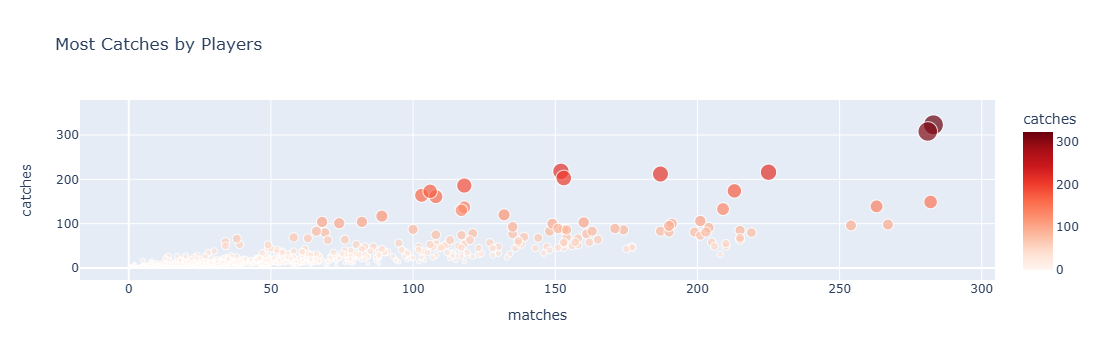

In [53]:
# Create the scatter plot to see the Which Player got most Catches
fig = px.scatter(final_df, x='matches', y='catches',color='catches',
                 size='catches', hover_name=final_df.index, title='Most Catches by Players')
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

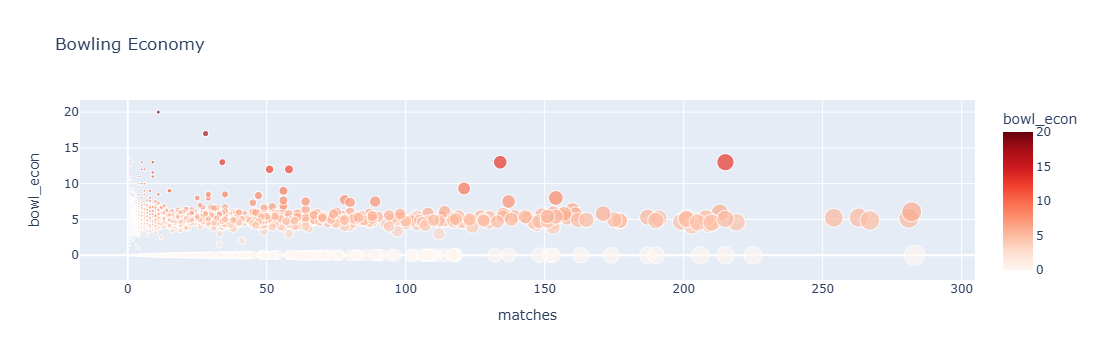

In [54]:
fig = px.scatter(final_df, x='matches', y='bowl_econ',color='bowl_econ',
                 size='matches', hover_name=final_df.index, title='Bowling Economy')
fig.update_layout(coloraxis=dict(colorscale='reds'))
fig.show()

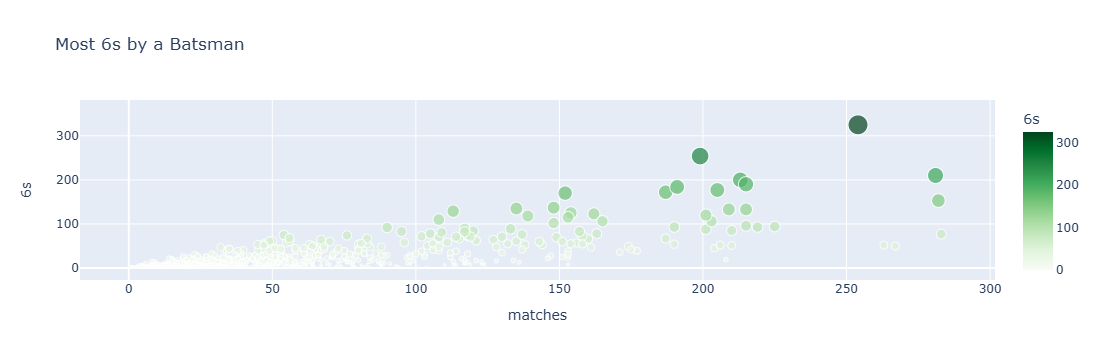

In [55]:
fig = px.scatter(final_df, x='matches', y='6s',color='6s',
                 size='6s', hover_name=final_df.index, title='Most 6s by a Batsman')
fig.update_layout(coloraxis=dict(colorscale='greens'))

# Show the plot
fig.show()

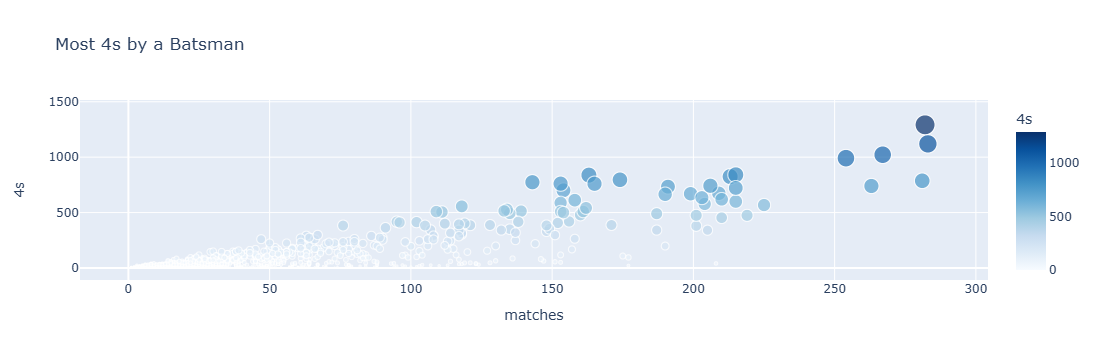

In [56]:
# Create the scatter plot to see the Most 4s by a Batsman
fig = px.scatter(final_df, x='matches', y='4s',color='4s',
                 size='4s', hover_name=final_df.index, title='Most 4s by a Batsman')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

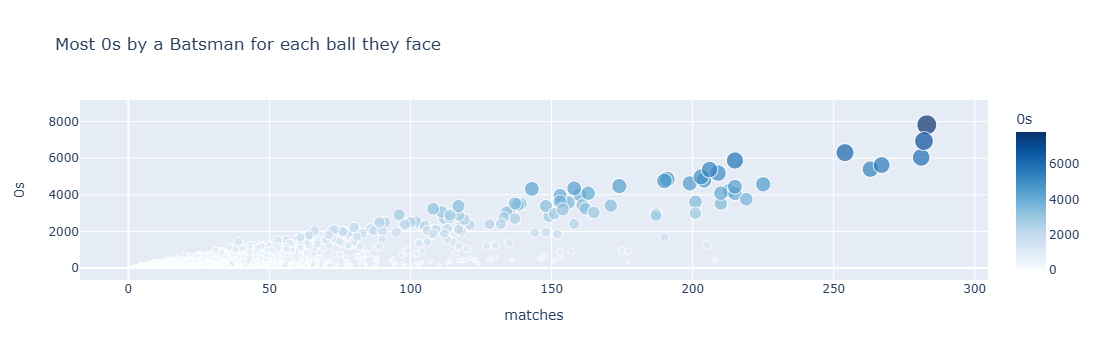

In [57]:
fig = px.scatter(final_df, x='matches', y='0s',color='0s',
                 size='0s', hover_name=final_df.index, title='Most 0s by a Batsman for each ball they face')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

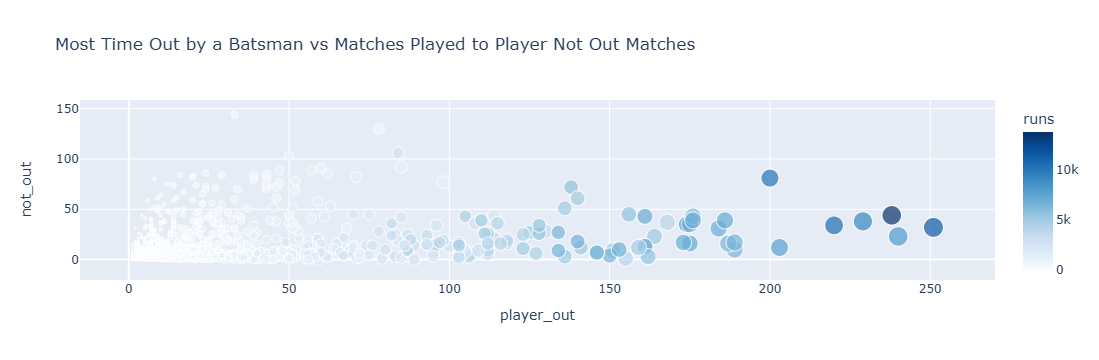

In [58]:
final_df['not_out'] = final_df['matches'] - final_df['player_out']

# Create the scatter plot to see the Most Time Out by a Batsman
fig = px.scatter(final_df, x='player_out', y='not_out', color='runs',
                 size='player_out', hover_name=final_df.index, 
                 title='Most Time Out by a Batsman vs Matches Played to Player Not Out Matches')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

In [59]:
final_df = final_df[final_df['matches']>50]
final_df.head()

matches  Balls_Faced  innings    runs      0s      1s     2s  \
A Balbirnie     78.0       3285.0      2.0  2438.0  1909.0   934.0  148.0   
A Flintoff      80.0       2366.0      2.0  2096.0  1310.0   651.0  137.0   
A Nehra         79.0        174.0      2.0    90.0   125.0    34.0    4.0   
A Nel           58.0        159.0      2.0   123.0    95.0    45.0    2.0   
A Symonds      118.0       4047.0      2.0  3589.0  2082.0  1273.0  285.0   

               3s     4s    6s  ...  bat_strike  BallsThrow  wickets  overs  \
A Balbirnie  26.0  239.0  29.0  ...       74.22        24.0      1.0    4.0   
A Flintoff    9.0  205.0  54.0  ...       88.59      3784.0    116.0  631.0   
A Nehra       0.0    9.0   2.0  ...       51.72      3745.0    105.0  624.0   
A Nel         0.0   14.0   3.0  ...       77.36      2941.0     84.0  490.0   
A Symonds    29.0  304.0  73.0  ...       88.68      3476.0     69.0  579.0   

             runs_conceded  bowl_econ  bowl_strike_rate  catches  \
A Balbirnie           31.0       7.75             24.00     28.0   
A Flintoff          2571.0       4.07             32.62     25.0   
A Nehra             3279.0       5.25             35.67     11.0   
A Nel               2200.0       4.49             35.01     13.0   
A Symonds           2894.0       5.00             50.38     54.0   

             man_of_matches  not_out  
A Balbirnie             3.0      4.0  
A Flintoff              9.0     21.0  
A Nehra                 2.0     59.0  
A Nel                   2.0     49.0  
A Symonds              12.0     36.0  

[5 rows x 22 columns]

In [60]:
import plotly.graph_objects as go

In [61]:
df_top10 = final_df.sort_values('bat_average', ascending=False).head(10)
df_top10

matches  Balls_Faced  innings     runs      0s      1s  \
V Kohli              282.0      15031.0      2.0  13784.0  6933.0  5673.0   
Babar Azam           111.0       6300.0      2.0   5511.0  3067.0  2248.0   
AB de Villiers       213.0       9488.0      2.0   9435.0  4225.0  3619.0   
MS Dhoni             281.0      12090.0      2.0  10274.0  6040.0  4305.0   
IJL Trott             65.0       3732.0      2.0   2819.0  1857.0  1405.0   
KL Rahul              70.0       3197.0      2.0   2761.0  1548.0  1229.0   
Fakhar Zaman          76.0       3721.0      2.0   3434.0  2009.0  1073.0   
HM Amla              174.0       9058.0      2.0   7834.0  4477.0  3197.0   
RG Sharma            254.0      11782.0      2.0  10646.0  6303.0  3647.0   
HE van der Dussen     58.0       2707.0      2.0   2322.0  1312.0  1011.0   

                      2s    3s      4s     6s  ...  bat_strike  BallsThrow  \
V Kohli            917.0  62.0  1292.0  153.0  ...       91.70       671.0   
Babar Azam         373.0  48.0   505.0   58.0  ...       87.48         0.0   
AB de Villiers     545.0  72.0   825.0  200.0  ...       99.44       201.0   
MS Dhoni           683.0  65.0   787.0  210.0  ...       84.98        38.0   
IJL Trott          221.0  30.0   216.0    3.0  ...       75.54       185.0   
KL Rahul           127.0  14.0   219.0   60.0  ...       86.36         0.0   
Fakhar Zaman       161.0  21.0   383.0   74.0  ...       92.29       135.0   
HM Amla            466.0  69.0   796.0   49.0  ...       86.49         0.0   
RG Sharma          469.0  44.0   991.0  325.0  ...       90.36       614.0   
HE van der Dussen  144.0  18.0   181.0   40.0  ...       85.78         6.0   

                   wickets  overs  runs_conceded  bowl_econ  bowl_strike_rate  \
V Kohli                5.0  112.0          680.0       6.07            134.20   
Babar Azam             0.0    0.0            0.0       0.00              0.00   
AB de Villiers         7.0   34.0          202.0       5.94             28.71   
MS Dhoni               1.0    6.0           31.0       5.17             38.00   
IJL Trott              2.0   31.0          166.0       5.35             92.50   
KL Rahul               0.0    0.0            0.0       0.00              0.00   
Fakhar Zaman           1.0   22.0          111.0       5.05            135.00   
HM Amla                0.0    0.0            0.0       0.00              0.00   
RG Sharma              9.0  102.0          533.0       5.23             68.22   
HE van der Dussen      1.0    1.0            3.0       3.00              6.00   

                   catches  man_of_matches  not_out  
V Kohli              149.0            38.0     44.0  
Babar Azam            50.0            10.0     15.0  
AB de Villiers       174.0            21.0     38.0  
MS Dhoni             308.0            19.0     81.0  
IJL Trott             14.0             1.0     10.0  
KL Rahul              63.0             2.0     14.0  
Fakhar Zaman          40.0             9.0      6.0  
HM Amla               86.0            15.0     13.0  
RG Sharma             96.0            22.0     34.0  
HE van der Dussen     24.0             3.0     10.0  

[10 rows x 22 columns]

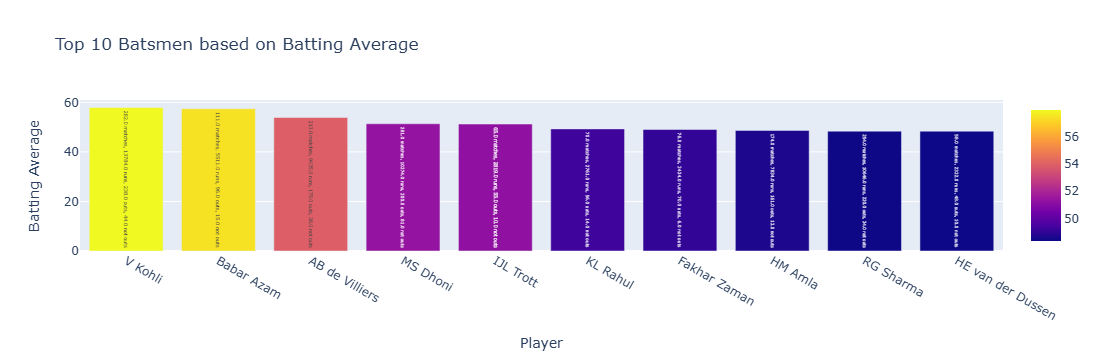

In [62]:
fig = go.Figure(data=[go.Bar(
    x=df_top10.index, y=df_top10['bat_average'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['runs'].astype(str) + ' runs, ' + df_top10['player_out'].astype(str) + ' outs, ' + df_top10['not_out'].astype(str) + ' not outs',
    textposition='auto',
    marker=dict(color=df_top10['bat_average'], coloraxis="coloraxis")
)])

fig.update_layout(title='Top 10 Batsmen based on Batting Average', xaxis_title="Player", yaxis_title="Batting Average")
fig.show()

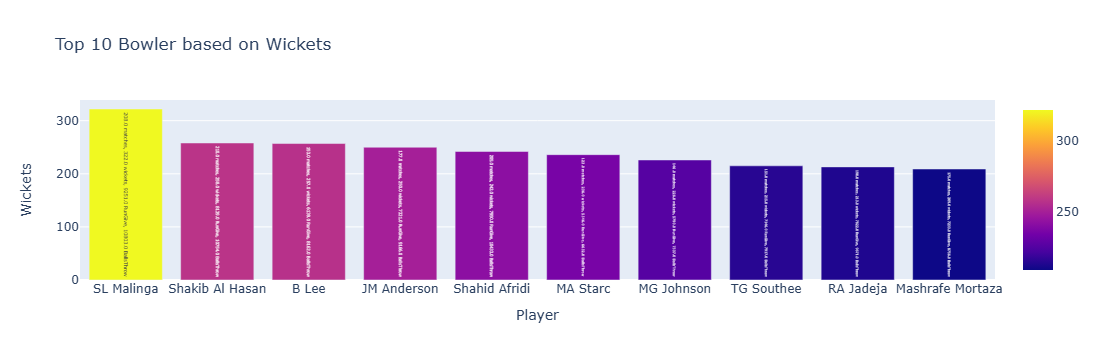

In [63]:
import plotly.graph_objects as go

df_top10 = final_df.sort_values('wickets', ascending=False).head(10)


# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top10.index, y=df_top10['wickets'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['wickets'].astype(str) + ' wickets, ' + df_top10['runs_conceded'].astype(str) + ' RunGive, ' + df_top10['BallsThrow'].astype(str) + ' BallsThrow',
    textposition='auto',
    marker=dict(color=df_top10['wickets'], coloraxis="coloraxis")
)])
fig.update_layout(title='Top 10 Bowler based on Wickets', xaxis_title="Player", yaxis_title="Wickets")
fig.show()

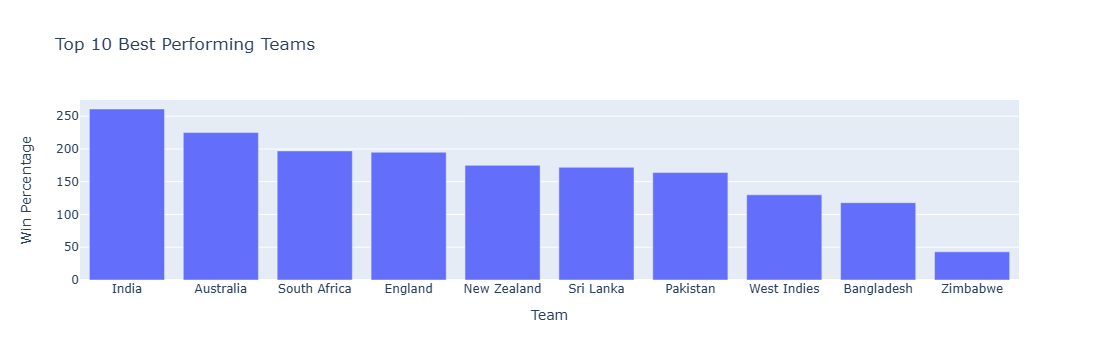

In [64]:
wins = df_matches["winner"].value_counts()

win_percentages = wins.sort_values(ascending=False)

# Plot the results
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Bar(x=wins.index[:10], y=wins.values[:10], name="Win Percentage"))
fig.update_layout(title="Top 10 Best Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

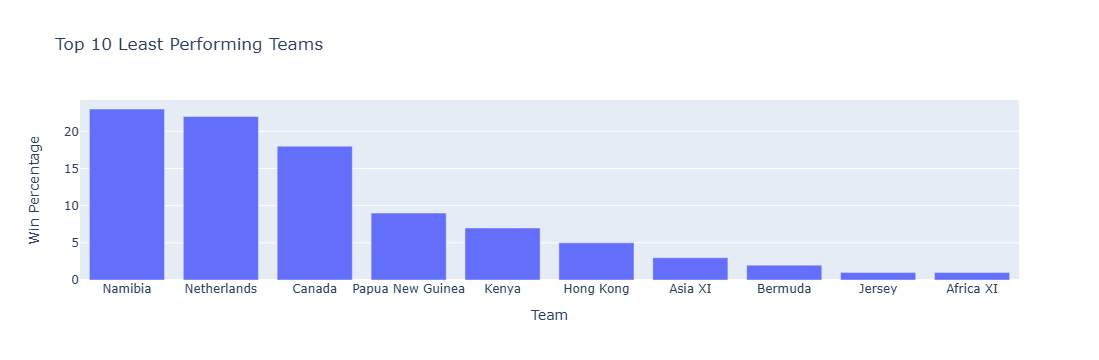

In [65]:
fig = go.Figure()
fig.add_trace(go.Bar(x=win_percentages.index[-10:], y=win_percentages.values[-10:], name="Win Percentage"))
fig.update_layout(title="Top 10 Least Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



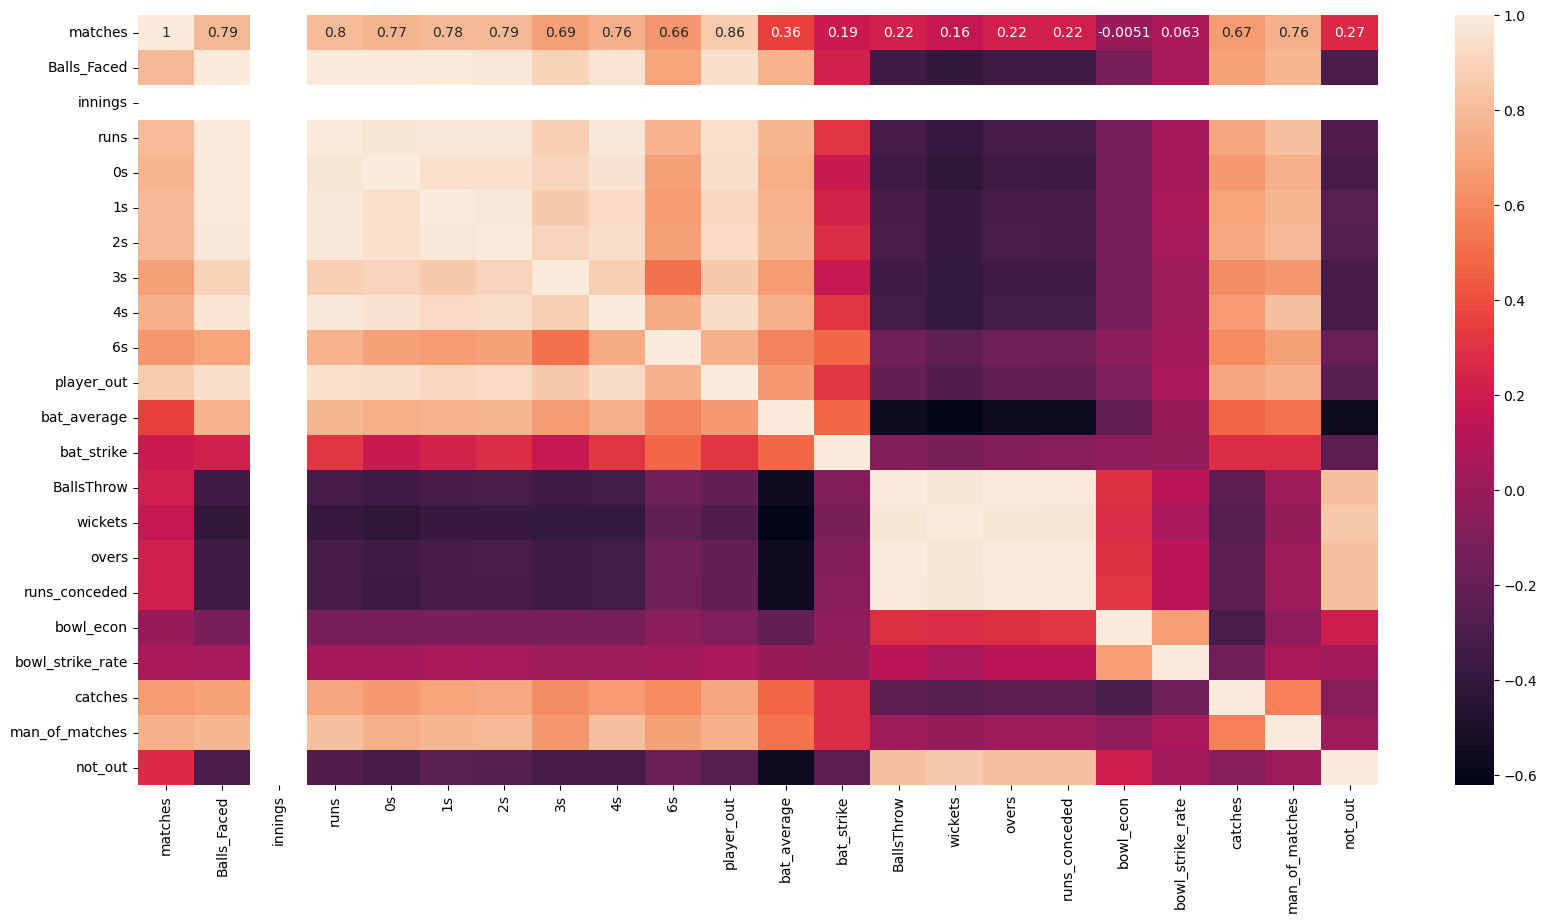

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(final_df.corr(), annot=True)
plt.show()

In [67]:
import numpy as np
def correlation(data, threshold):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=np.number)
    
    # Compute correlation matrix
    corr_matrix = numeric_data.corr()
    
    # Find correlations above threshold
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    col_corr = [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]
    
    return col_corr

# Call the correlation function
corr_cols = correlation(final_df, 0.85)
print(corr_cols)

['runs', '0s', '1s', '2s', '3s', '4s', 'player_out', 'wickets', 'overs', 'runs_conceded', 'not_out']


In [68]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [69]:
df_balls['match_id'] = df_balls['match_id'].astype(str)

df_balls['runs_total'] = pd.to_numeric(df_balls['runs_total'], errors='coerce')

df_balls['runs_total'] = df_balls['runs_total'].fillna(0)

inningScores = df_balls.groupby(['match_id', 'innings'], as_index=False)['runs_total'].sum()

inningScores = inningScores[inningScores['innings']==1]
inningScores.head(10)

match_id  innings  runs_total
0   1000887        1         268
2   1000889        1         220
4   1000891        1         263
6   1000893        1         353
8   1000895        1         369
10  1001371        1         324
12  1001373        1         378
14  1001375        1         264
16  1004283        1         153
18  1004285        1         266

In [70]:
inningScores['target'] = inningScores['runs_total'] + 1
inningScores.head(10)

match_id  innings  runs_total  target
0   1000887        1         268     269
2   1000889        1         220     221
4   1000891        1         263     264
6   1000893        1         353     354
8   1000895        1         369     370
10  1001371        1         324     325
12  1001373        1         378     379
14  1001375        1         264     265
16  1004283        1         153     154
18  1004285        1         266     267

In [71]:
df_matches = df_matches.merge(inningScores[['match_id','target']], on='match_id')

In [72]:
teams = [
    'Afghanistan', 'Australia', 'Bangladesh', 'England', 'India', 'New Zealand', 
    'Pakistan', 'South Africa', 'Sri Lanka', 'West Indies', 'Zimbabwe'
]

In [73]:
df_matches['team1'].unique()

array(['Australia', 'Bangladesh', 'New Zealand', 'South Africa', 'India',
       'England', 'Pakistan', 'Hong Kong', 'Ireland', 'Sri Lanka',
       'West Indies', 'Scotland', 'United Arab Emirates',
       'Papua New Guinea', 'Nepal', 'Namibia', 'Oman', 'Netherlands',
       'Canada', 'Jersey', 'United States of America', 'Africa XI',
       'Bermuda', 'Kenya'], dtype=object)

In [74]:
df_matches = df_matches[df_matches['team1'].isin(teams)]
df_matches = df_matches[df_matches['team2'].isin(teams)]
df_matches = df_matches[df_matches['winner'].isin(teams)]

In [75]:
df_matches['team1'].unique()

array(['Australia', 'Bangladesh', 'New Zealand', 'South Africa', 'India',
       'England', 'Pakistan', 'Sri Lanka', 'West Indies'], dtype=object)

In [76]:
df_matches.isnull().sum()

match_id              0
city                  0
date                  0
player_of_match       0
venue                 0
match_type            0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin         0
result_margin_type    0
umpire1               0
umpire2               0
season                0
team_type             0
team1_players         0
team2_players         0
target                0
dtype: int64

In [77]:
matches = df_matches[['match_id','city','team1','team2','winner','target']].dropna()
matches.head()

match_id          city       team1        team2       winner  target
0  1000887      Brisbane   Australia     Pakistan    Australia     269
1  1000891         Perth   Australia     Pakistan    Australia     264
2  1001373      Canberra   Australia  New Zealand    Australia     379
3  1019973  Christchurch  Bangladesh  New Zealand  New Zealand     342
4  1019975        Nelson  Bangladesh  New Zealand  New Zealand     252

In [78]:
balls = df_balls[df_balls['team'].isin(teams)]
balls.head()

match_id  innings       team  over  ball_number     batter         bowler  \
0  1000887        1  Australia     0            1  DA Warner  Mohammad Amir   
1  1000887        1  Australia     0            2  DA Warner  Mohammad Amir   
2  1000887        1  Australia     0            3  DA Warner  Mohammad Amir   
3  1000887        1  Australia     0            4  DA Warner  Mohammad Amir   
4  1000887        1  Australia     0            5  DA Warner  Mohammad Amir   

  non_striker  runs_batter  runs_extras  runs_total extra_type  \
0     TM Head            0            0           0          0   
1     TM Head            0            0           0          0   
2     TM Head            0            0           0          0   
3     TM Head            0            0           0          0   
4     TM Head            0            1           1      wides   

   isWicketDelivery player_out kind fielders_involved  extra_wides  \
0             False          0    0                 0          0.0   
1             False          0    0                 0          0.0   
2             False          0    0                 0          0.0   
3             False          0    0                 0          0.0   
4             False          0    0                 0          1.0   

   extra_legbyes  extra_noballs  extra_byes  extra_penalty  
0            0.0            0.0         0.0            0.0  
1            0.0            0.0         0.0            0.0  
2            0.0            0.0         0.0            0.0  
3            0.0            0.0         0.0            0.0  
4            0.0            0.0         0.0            0.0

In [79]:
balls.shape

(1046382, 21)

In [80]:
final = matches.merge(balls, on='match_id')
final.head()

match_id      city      team1     team2     winner  target  innings  \
0  1000887  Brisbane  Australia  Pakistan  Australia     269        1   
1  1000887  Brisbane  Australia  Pakistan  Australia     269        1   
2  1000887  Brisbane  Australia  Pakistan  Australia     269        1   
3  1000887  Brisbane  Australia  Pakistan  Australia     269        1   
4  1000887  Brisbane  Australia  Pakistan  Australia     269        1   

        team  over  ball_number     batter         bowler non_striker  \
0  Australia     0            1  DA Warner  Mohammad Amir     TM Head   
1  Australia     0            2  DA Warner  Mohammad Amir     TM Head   
2  Australia     0            3  DA Warner  Mohammad Amir     TM Head   
3  Australia     0            4  DA Warner  Mohammad Amir     TM Head   
4  Australia     0            5  DA Warner  Mohammad Amir     TM Head   

   runs_batter  runs_extras  runs_total extra_type  isWicketDelivery  \
0            0            0           0          0             False   
1            0            0           0          0             False   
2            0            0           0          0             False   
3            0            0           0          0             False   
4            0            1           1      wides             False   

  player_out kind fielders_involved  extra_wides  extra_legbyes  \
0          0    0                 0          0.0            0.0   
1          0    0                 0          0.0            0.0   
2          0    0                 0          0.0            0.0   
3          0    0                 0          0.0            0.0   
4          0    0                 0          1.0            0.0   

   extra_noballs  extra_byes  extra_penalty  
0            0.0         0.0            0.0  
1            0.0         0.0            0.0  
2            0.0         0.0            0.0  
3            0.0         0.0            0.0  
4            0.0         0.0            0.0

In [81]:
final.shape

(821711, 26)

In [82]:
final = final[final['innings']==2]
final.head()

match_id      city      team1     team2     winner  target  innings  \
310  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
311  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
312  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
313  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
314  1000887  Brisbane  Australia  Pakistan  Australia     269        2   

         team  over  ball_number         batter    bowler    non_striker  \
310  Pakistan     0            1      Azhar Ali  MA Starc  Sharjeel Khan   
311  Pakistan     0            2      Azhar Ali  MA Starc  Sharjeel Khan   
312  Pakistan     0            3      Azhar Ali  MA Starc  Sharjeel Khan   
313  Pakistan     0            4      Azhar Ali  MA Starc  Sharjeel Khan   
314  Pakistan     0            5  Sharjeel Khan  MA Starc      Azhar Ali   

     runs_batter  runs_extras  runs_total extra_type  isWicketDelivery  \
310            0            0           0          0             False   
311            0            0           0          0             False   
312            0            0           0          0             False   
313            1            0           1          0             False   
314            0            0           0          0             False   

    player_out kind fielders_involved  extra_wides  extra_legbyes  \
310          0    0                 0          0.0            0.0   
311          0    0                 0          0.0            0.0   
312          0    0                 0          0.0            0.0   
313          0    0                 0          0.0            0.0   
314          0    0                 0          0.0            0.0   

     extra_noballs  extra_byes  extra_penalty  
310            0.0         0.0            0.0  
311            0.0         0.0            0.0  
312            0.0         0.0            0.0  
313            0.0         0.0            0.0  
314            0.0         0.0            0.0

In [83]:
final['current_score'] = final.groupby('match_id')['runs_total'].cumsum()
final.head()

match_id      city      team1     team2     winner  target  innings  \
310  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
311  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
312  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
313  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
314  1000887  Brisbane  Australia  Pakistan  Australia     269        2   

         team  over  ball_number         batter    bowler    non_striker  \
310  Pakistan     0            1      Azhar Ali  MA Starc  Sharjeel Khan   
311  Pakistan     0            2      Azhar Ali  MA Starc  Sharjeel Khan   
312  Pakistan     0            3      Azhar Ali  MA Starc  Sharjeel Khan   
313  Pakistan     0            4      Azhar Ali  MA Starc  Sharjeel Khan   
314  Pakistan     0            5  Sharjeel Khan  MA Starc      Azhar Ali   

     runs_batter  runs_extras  runs_total extra_type  isWicketDelivery  \
310            0            0           0          0             False   
311            0            0           0          0             False   
312            0            0           0          0             False   
313            1            0           1          0             False   
314            0            0           0          0             False   

    player_out kind fielders_involved  extra_wides  extra_legbyes  \
310          0    0                 0          0.0            0.0   
311          0    0                 0          0.0            0.0   
312          0    0                 0          0.0            0.0   
313          0    0                 0          0.0            0.0   
314          0    0                 0          0.0            0.0   

     extra_noballs  extra_byes  extra_penalty  current_score  
310            0.0         0.0            0.0              0  
311            0.0         0.0            0.0              0  
312            0.0         0.0            0.0              0  
313            0.0         0.0            0.0              1  
314            0.0         0.0            0.0              1

In [84]:
final['runs_left'] = np.where(final['target']-final['current_score']>=0, final['target']-final['current_score'], 0)
final.head()

match_id      city      team1     team2     winner  target  innings  \
310  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
311  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
312  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
313  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
314  1000887  Brisbane  Australia  Pakistan  Australia     269        2   

         team  over  ball_number         batter    bowler    non_striker  \
310  Pakistan     0            1      Azhar Ali  MA Starc  Sharjeel Khan   
311  Pakistan     0            2      Azhar Ali  MA Starc  Sharjeel Khan   
312  Pakistan     0            3      Azhar Ali  MA Starc  Sharjeel Khan   
313  Pakistan     0            4      Azhar Ali  MA Starc  Sharjeel Khan   
314  Pakistan     0            5  Sharjeel Khan  MA Starc      Azhar Ali   

     runs_batter  runs_extras  runs_total extra_type  isWicketDelivery  \
310            0            0           0          0             False   
311            0            0           0          0             False   
312            0            0           0          0             False   
313            1            0           1          0             False   
314            0            0           0          0             False   

    player_out kind fielders_involved  extra_wides  extra_legbyes  \
310          0    0                 0          0.0            0.0   
311          0    0                 0          0.0            0.0   
312          0    0                 0          0.0            0.0   
313          0    0                 0          0.0            0.0   
314          0    0                 0          0.0            0.0   

     extra_noballs  extra_byes  extra_penalty  current_score  runs_left  
310            0.0         0.0            0.0              0        269  
311            0.0         0.0            0.0              0        269  
312            0.0         0.0            0.0              0        269  
313            0.0         0.0            0.0              1        268  
314            0.0         0.0            0.0              1        268

In [85]:
final["is_legal_delivery"] = final["extra_type"] == 0

# Step 2: Calculate cumulative legal deliveries bowled so far
# Group by match_id and innings, and calculate cumulative legal deliveries
final["legal_balls_bowled"] = final.groupby(["match_id", "innings"])["is_legal_delivery"].cumsum()

# Step 3: Calculate balls left
# Total balls in an ODI match per innings = 300
TOTAL_BALLS = 300
final["balls_left"] = TOTAL_BALLS - final["legal_balls_bowled"]
final.head(30)

match_id      city      team1     team2     winner  target  innings  \
310  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
311  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
312  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
313  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
314  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
315  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
316  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
317  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
318  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
319  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
320  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
321  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
322  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
323  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
324  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
325  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
326  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
327  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
328  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
329  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
330  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
331  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
332  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
333  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
334  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
335  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
336  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
337  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
338  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
339  1000887  Brisbane  Australia  Pakistan  Australia     269        2   

         team  over  ball_number         batter      bowler    non_striker  \
310  Pakistan     0            1      Azhar Ali    MA Starc  Sharjeel Khan   
311  Pakistan     0            2      Azhar Ali    MA Starc  Sharjeel Khan   
312  Pakistan     0            3      Azhar Ali    MA Starc  Sharjeel Khan   
313  Pakistan     0            4      Azhar Ali    MA Starc  Sharjeel Khan   
314  Pakistan     0            5  Sharjeel Khan    MA Starc      Azhar Ali   
315  Pakistan     0            6  Sharjeel Khan    MA Starc      Azhar Ali   
316  Pakistan     1            7      Azhar Ali  B Stanlake  Sharjeel Khan   
317  Pakistan     1            8      Azhar Ali  B Stanlake  Sharjeel Khan   
318  Pakistan     1            9      Azhar Ali  B Stanlake  Sharjeel Khan   
319  Pakistan     1           10      Azhar Ali  B Stanlake  Sharjeel Khan   
320  Pakistan     1           11      Azhar Ali  B Stanlake  Sharjeel Khan   
321  Pakistan     1           12      Azhar Ali  B Stanlake  Sharjeel Khan   
322  Pakistan     2           13      Azhar Ali    MA Starc  Sharjeel Khan   
323  Pakistan     2           14      Azhar Ali    MA Starc  Sharjeel Khan   
324  Pakistan     2           15      Azhar Ali    MA Starc  Sharjeel Khan   
325  Pakistan     2           16      Azhar Ali    MA Starc  Sharjeel Khan   
326  Pakistan     2           17      Azhar Ali    MA Starc  Sharjeel Khan   
327  Pakistan     2           18      Azhar Ali    MA Starc  Sharjeel Khan   
328  Pakistan     2           19      Azhar Ali    MA Starc  Sharjeel Khan   
329  Pakistan     3           20  Sharjeel Khan  B Stanlake      Azhar Ali   
330  Pakistan     3           21  Sharje

In [86]:
final['wickets_left'] = 10 - final.groupby('match_id')['isWicketDelivery'].cumsum()
final.head()

match_id      city      team1     team2     winner  target  innings  \
310  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
311  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
312  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
313  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
314  1000887  Brisbane  Australia  Pakistan  Australia     269        2   

         team  over  ball_number         batter    bowler    non_striker  \
310  Pakistan     0            1      Azhar Ali  MA Starc  Sharjeel Khan   
311  Pakistan     0            2      Azhar Ali  MA Starc  Sharjeel Khan   
312  Pakistan     0            3      Azhar Ali  MA Starc  Sharjeel Khan   
313  Pakistan     0            4      Azhar Ali  MA Starc  Sharjeel Khan   
314  Pakistan     0            5  Sharjeel Khan  MA Starc      Azhar Ali   

     runs_batter  runs_extras  runs_total extra_type  isWicketDelivery  \
310            0            0           0          0             False   
311            0            0           0          0             False   
312            0            0           0          0             False   
313            1            0           1          0             False   
314            0            0           0          0             False   

    player_out kind fielders_involved  extra_wides  extra_legbyes  \
310          0    0                 0          0.0            0.0   
311          0    0                 0          0.0            0.0   
312          0    0                 0          0.0            0.0   
313          0    0                 0          0.0            0.0   
314          0    0                 0          0.0            0.0   

     extra_noballs  extra_byes  extra_penalty  current_score  runs_left  \
310            0.0         0.0            0.0              0        269   
311            0.0         0.0            0.0              0        269   
312            0.0         0.0            0.0              0        269   
313            0.0         0.0            0.0              1        268   
314            0.0         0.0            0.0              1        268   

     is_legal_delivery  legal_balls_bowled  balls_left  wickets_left  
310               True                   1         299            10  
311               True                   2         298            10  
312               True                   3         297            10  
313               True                   4         296            10  
314               True                   5         295            10

In [87]:
final['current_run_rate'] = np.where((300 - final['balls_left']) == 0,0, (final['current_score'] * 6) / (300 - final['balls_left']))
final['required_run_rate'] = np.where(final['balls_left']>0, final['runs_left']*6/final['balls_left'], 0)

In [88]:
def result(row):
    return 1 if row['team'] == row['winner'] else 0

In [89]:
final['result'] = final.apply(result, axis=1)
final.head()

match_id      city      team1     team2     winner  target  innings  \
310  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
311  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
312  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
313  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
314  1000887  Brisbane  Australia  Pakistan  Australia     269        2   

         team  over  ball_number         batter    bowler    non_striker  \
310  Pakistan     0            1      Azhar Ali  MA Starc  Sharjeel Khan   
311  Pakistan     0            2      Azhar Ali  MA Starc  Sharjeel Khan   
312  Pakistan     0            3      Azhar Ali  MA Starc  Sharjeel Khan   
313  Pakistan     0            4      Azhar Ali  MA Starc  Sharjeel Khan   
314  Pakistan     0            5  Sharjeel Khan  MA Starc      Azhar Ali   

     runs_batter  runs_extras  runs_total extra_type  isWicketDelivery  \
310            0            0           0          0             False   
311            0            0           0          0             False   
312            0            0           0          0             False   
313            1            0           1          0             False   
314            0            0           0          0             False   

    player_out kind fielders_involved  extra_wides  extra_legbyes  \
310          0    0                 0          0.0            0.0   
311          0    0                 0          0.0            0.0   
312          0    0                 0          0.0            0.0   
313          0    0                 0          0.0            0.0   
314          0    0                 0          0.0            0.0   

     extra_noballs  extra_byes  extra_penalty  current_score  runs_left  \
310            0.0         0.0            0.0              0        269   
311            0.0         0.0            0.0              0        269   
312            0.0         0.0            0.0              0        269   
313            0.0         0.0            0.0              1        268   
314            0.0         0.0            0.0              1        268   

     is_legal_delivery  legal_balls_bowled  balls_left  wickets_left  \
310               True                   1         299            10   
311               True                   2         298            10   
312               True                   3         297            10   
313               True                   4         296            10   
314               True                   5         295            10   

     current_run_rate  required_run_rate  result  
310               0.0           5.397993       0  
311               0.0           5.416107       0  
312               0.0           5.434343       0  
313               1.5           5.432432       0  
314               1.2           5.450847       0

In [90]:
final.to_csv('final.csv')

In [91]:
final['BattingTeam'] = final['team']
final['BowlingTeam'] = final.apply(
    lambda row: row['team2'] if row['team'] == row['team1'] else row['team1'], axis=1
)

final.head()

match_id      city      team1     team2     winner  target  innings  \
310  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
311  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
312  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
313  1000887  Brisbane  Australia  Pakistan  Australia     269        2   
314  1000887  Brisbane  Australia  Pakistan  Australia     269        2   

         team  over  ball_number         batter    bowler    non_striker  \
310  Pakistan     0            1      Azhar Ali  MA Starc  Sharjeel Khan   
311  Pakistan     0            2      Azhar Ali  MA Starc  Sharjeel Khan   
312  Pakistan     0            3      Azhar Ali  MA Starc  Sharjeel Khan   
313  Pakistan     0            4      Azhar Ali  MA Starc  Sharjeel Khan   
314  Pakistan     0            5  Sharjeel Khan  MA Starc      Azhar Ali   

     runs_batter  runs_extras  runs_total extra_type  isWicketDelivery  \
310            0            0           0          0             False   
311            0            0           0          0             False   
312            0            0           0          0             False   
313            1            0           1          0             False   
314            0            0           0          0             False   

    player_out kind fielders_involved  extra_wides  extra_legbyes  \
310          0    0                 0          0.0            0.0   
311          0    0                 0          0.0            0.0   
312          0    0                 0          0.0            0.0   
313          0    0                 0          0.0            0.0   
314          0    0                 0          0.0            0.0   

     extra_noballs  extra_byes  extra_penalty  current_score  runs_left  \
310            0.0         0.0            0.0              0        269   
311            0.0         0.0            0.0              0        269   
312            0.0         0.0            0.0              0        269   
313            0.0         0.0            0.0              1        268   
314            0.0         0.0            0.0              1        268   

     is_legal_delivery  legal_balls_bowled  balls_left  wickets_left  \
310               True                   1         299            10   
311               True                   2         298            10   
312               True                   3         297            10   
313               True                   4         296            10   
314               True                   5         295            10   

     current_run_rate  required_run_rate  result BattingTeam BowlingTeam  
310               0.0           5.397993       0    Pakistan   Australia  
311               0.0           5.416107       0    Pakistan   Australia  
312               0.0           5.434343       0    Pakistan   Australia  
313               1.5           5.432432       0    Pakistan   Australia  
314               1.2           5.450847       0    Pakistan   Australia

In [92]:
winningPred = final[['BattingTeam', 'BowlingTeam','city','runs_left','balls_left','wickets_left','current_run_rate','required_run_rate','target','result']]
winningPred.head(30)

BattingTeam BowlingTeam      city  runs_left  balls_left  wickets_left  \
310    Pakistan   Australia  Brisbane        269         299            10   
311    Pakistan   Australia  Brisbane        269         298            10   
312    Pakistan   Australia  Brisbane        269         297            10   
313    Pakistan   Australia  Brisbane        268         296            10   
314    Pakistan   Australia  Brisbane        268         295            10   
315    Pakistan   Australia  Brisbane        268         294            10   
316    Pakistan   Australia  Brisbane        268         293            10   
317    Pakistan   Australia  Brisbane        268         292            10   
318    Pakistan   Australia  Brisbane        268         291            10   
319    Pakistan   Australia  Brisbane        268         290            10   
320    Pakistan   Australia  Brisbane        268         289            10   
321    Pakistan   Australia  Brisbane        267         288            10   
322    Pakistan   Australia  Brisbane        267         287            10   
323    Pakistan   Australia  Brisbane        265         286            10   
324    Pakistan   Australia  Brisbane        264         286            10   
325    Pakistan   Australia  Brisbane        264         285            10   
326    Pakistan   Australia  Brisbane        262         284            10   
327    Pakistan   Australia  Brisbane        258         284            10   
328    Pakistan   Australia  Brisbane        258         283            10   
329    Pakistan   Australia  Brisbane        258         282            10   
330    Pakistan   Australia  Brisbane        258         281            10   
331    Pakistan   Australia  Brisbane        257         281            10   
332    Pakistan   Australia  Brisbane        257         280            10   
333    Pakistan   Australia  Brisbane        257         279            10   
334    Pakistan   Australia  Brisbane        256         278            10   
335    Pakistan   Australia  Brisbane        256         277            10   
336    Pakistan   Australia  Brisbane        256         276            10   
337    Pakistan   Australia  Brisbane        256         275            10   
338    Pakistan   Australia  Brisbane        254         274            10   
339    Pakistan   Australia  Brisbane        252         273            10   

     current_run_rate  required_run_rate  target  result  
310          0.000000           5.397993     269       0  
311          0.000000           5.416107     269       0  
312          0.000000           5.434343     269       0  
313          1.500000           5.432432     269       0  
314          1.200000           5.450847     269       0  
315          1.000000           5.469388     269       0  
316          0.857143           5.488055     269       0  
317          0.750000           5.506849     269       0  
318          0.666667           5.525773     269       0  
319          0.600000           5.544828     269       0  
320          0.545455           5.564014     269       0  
321          1.000000           5.562500     269       0  
322          0.923077           5.581882     269       0  
323          1.714286           5.559441     269       0  
324          2.142857           5.538462     269       0  
325          2.000000           5.557895     269       0  
326          2.625000           5.535211     269       0  
327          4.125000           5.450704     269       0  
328          3.882353           5.469965     269       0  
329          3.666667           5.489362     269       0  
330          3.473684           5.508897     269       0  
331          3.789474           5.487544     269       0  
332          3.600000           5.507143     269       0  
333          3.428571           5.526882     269       0  
334          3.545455           5.525180     269       0  
335          3.391304           5.545126     269   

In [93]:
winningPred.sample()

BattingTeam  BowlingTeam      city  runs_left  balls_left  \
508972       India  New Zealand  Vadodara          3          68   

        wickets_left  current_run_rate  required_run_rate  target  result  
508972             9          5.741379           0.264706     225       1

In [113]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(drop='first'), ['BattingTeam', 'BowlingTeam', 'city'])
],
remainder='passthrough')

In [114]:
trf = ColumnTransformer([
    ('trf', OneHotEncoder(drop='first'), ['BattingTeam', 'BowlingTeam', 'city'])
],
remainder='passthrough', sparse_threshold=0)

In [115]:
from sklearn.model_selection import train_test_split

X = winningPred.drop('result', axis=1)
y = winningPred['result']
X.shape, y.shape

((380871, 9), (380871,))

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [118]:
pipe_RF = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])
pipe_RF.fit(X_train, y_train)
y_pred = pipe_RF.predict(X_test)

In [119]:
pipe_RF.predict_proba(X_test)

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       ...,
       [0.04, 0.96],
       [0.02, 0.98],
       [1.  , 0.  ]])

In [120]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.97%


In [136]:
q = [['India', 'South Africa', 'Johannesburg', 165,120, 4,4.5, 8.25, 300]]
columns = ['BattingTeam', 'BowlingTeam', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

team = pd.DataFrame(q,columns=columns)

In [137]:
pipe_RF.predict_proba(team)

array([[0.99, 0.01]])

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC     # Initialize the logistic regression model

In [107]:
from sklearn.model_selection import train_test_split

X_log = winningPred.drop('result', axis=1)
y_log = winningPred['result']
X_log.shape, y_log.shape

((380871, 9), (380871,))

In [108]:
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression())
])
pipe.fit(X_log_train, y_log_train)
y_log_pred = pipe.predict(X_log_test)

In [110]:
accuracy = accuracy_score(y_log_test, y_log_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8412208729898261


In [111]:
q = [['India', 'South Africa', 'Durban', 165,120, 9,4.5, 8.25, 300]]
columns = ['BattingTeam', 'BowlingTeam', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

team = pd.DataFrame(q,columns=columns)

In [112]:
pipe.predict_proba(team)

array([[0.49454297, 0.50545703]])

SVM

In [126]:
import joblib

joblib.dump(pipe_RF,'TeamPrediction.pkl')

['TeamPrediction.pkl']